# **Name : Ghori Zeel JivrajbhaI**

# **Student ID : 202201287**

# **Course : Applied Forecasting Methods**

# **LAB 04**

# **Colab file link :** https://colab.research.google.com/drive/1DjKttwvo2s9mBIHVR5wNahxyv7BNv7Rq?usp=sharing


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from itertools import product
from statsmodels.stats.diagnostic import acorr_ljungbox
from tqdm.notebook import tqdm_notebook

# **Task 1: Understanding the Data**
1. Load all the dataset and display the first few rows.
2. Plot the time series data to observe trends and seasonality.

In [ ]:
# Load datasets
widget_sales = pd.read_csv('/content/widget_sales.csv')
foot_traffic = pd.read_csv('/content/foot_traffic.csv')
bandwidth_usage = pd.read_csv('/content/bandwidth_usage.csv')

In [ ]:
print("First few rows of the dataset:")

First few rows of the dataset:


In [ ]:
widget_sales.head()

,widget_sales
0,50.496714
1,50.805493
2,51.477758
3,53.542228
4,54.873108


In [ ]:
foot_traffic.head()

,foot_traffic
0,500.496714
1,500.522366
2,501.426876
3,503.295990
4,504.132695


In [ ]:
bandwidth_usage.head()

,hourly_bandwidth
0,1000.496714
1,1000.969408
2,1002.046019
3,1004.702118
4,1007.447816


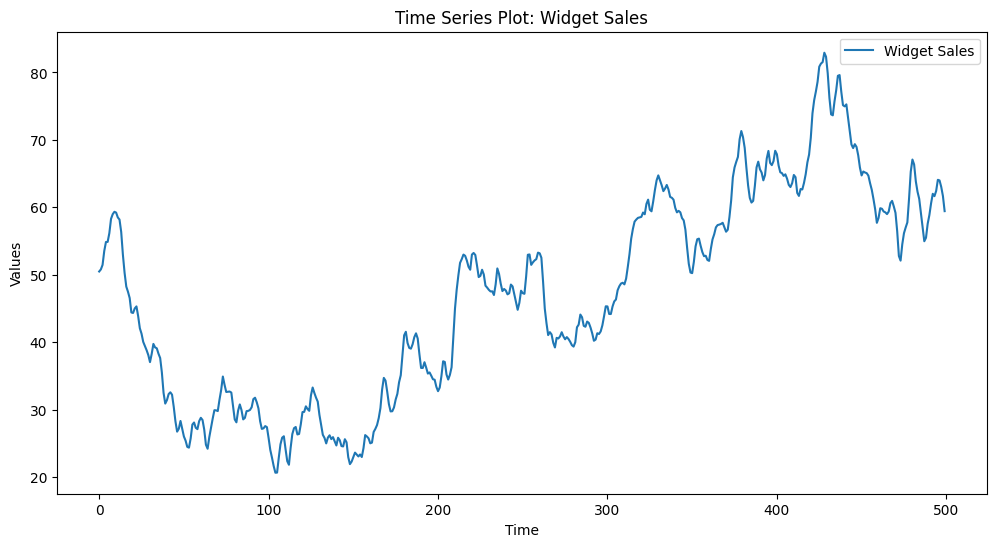

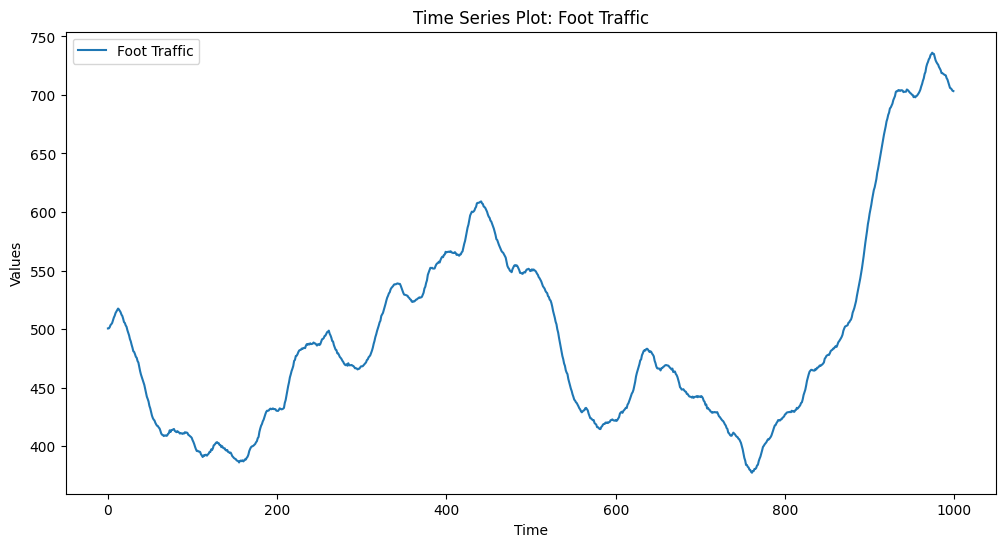

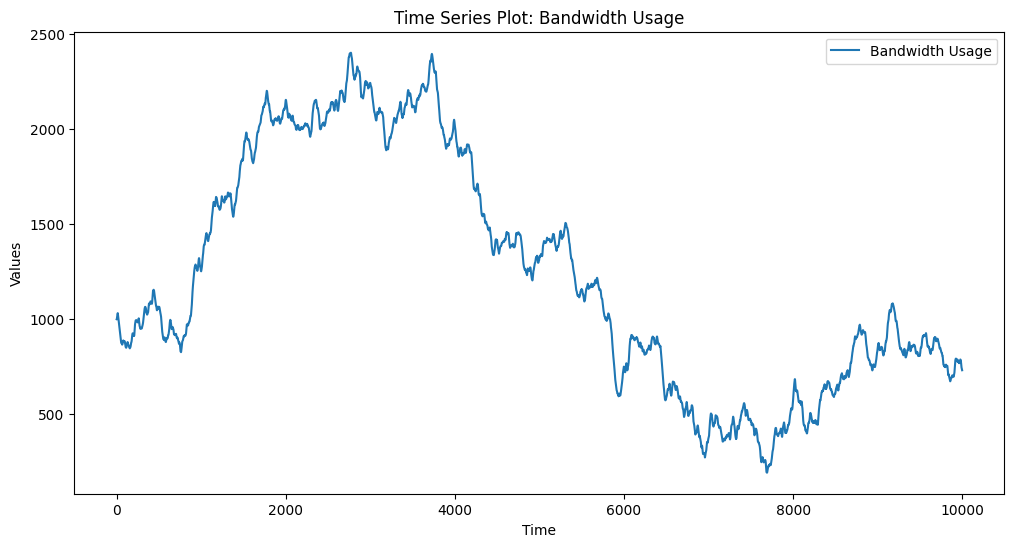

In [ ]:
def plot_time_series(df, title):
    plt.figure(figsize=(12, 6))
    plt.plot(df, label=title)
    plt.title(f'Time Series Plot: {title}')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

# Plot time series
datasets = {'Widget Sales': widget_sales, 'Foot Traffic': foot_traffic, 'Bandwidth Usage': bandwidth_usage}
for name, df in datasets.items():
    plot_time_series(df, name)

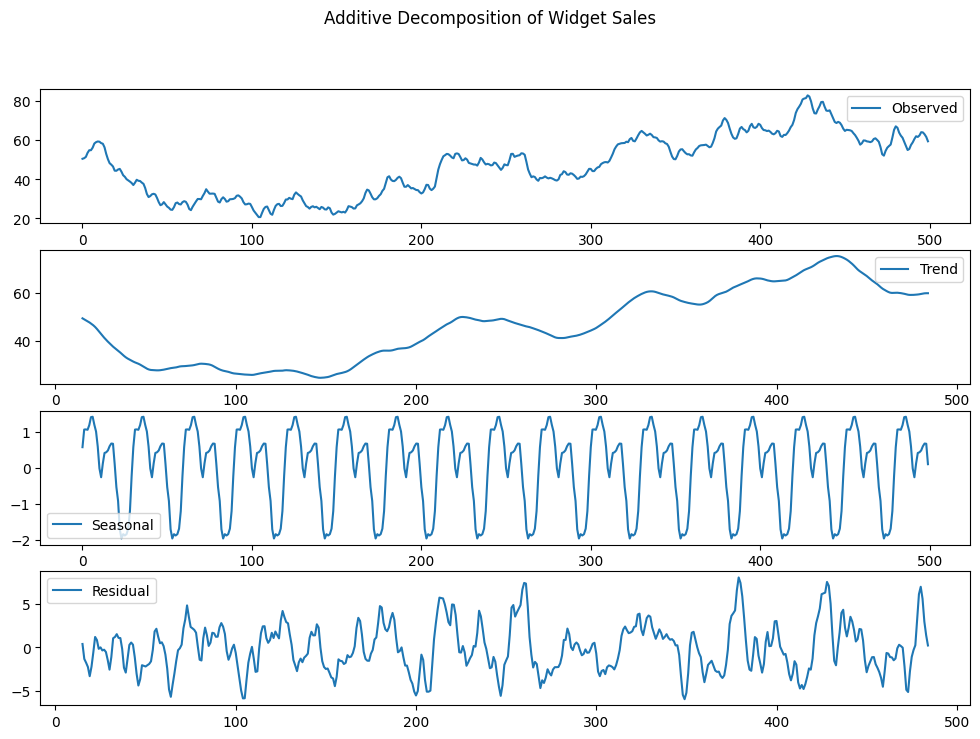

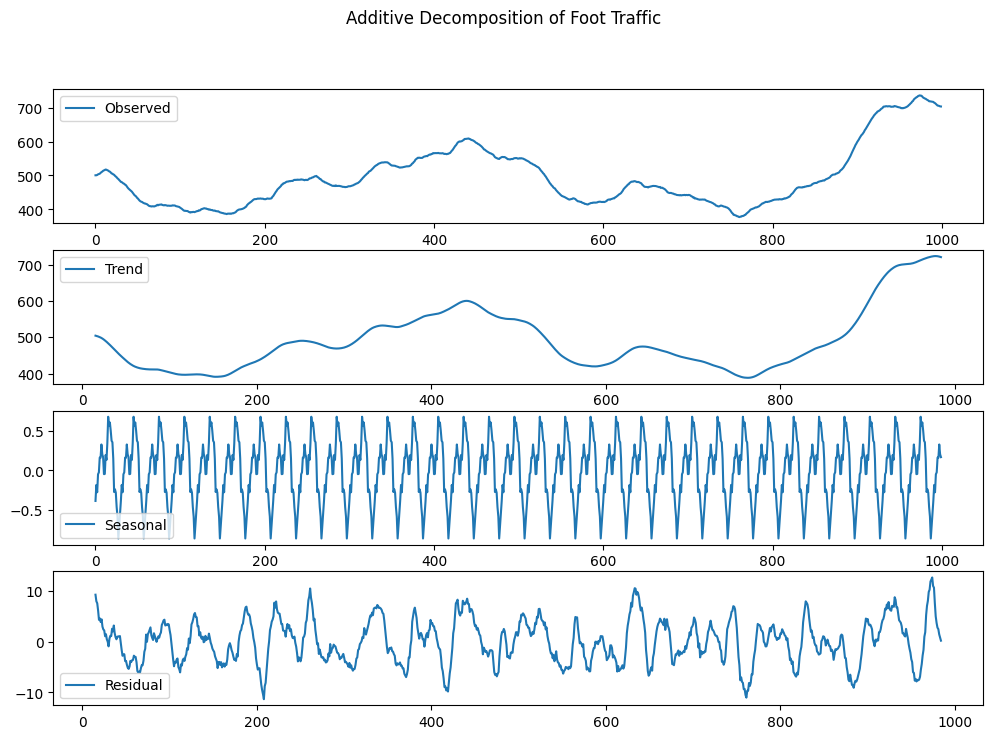

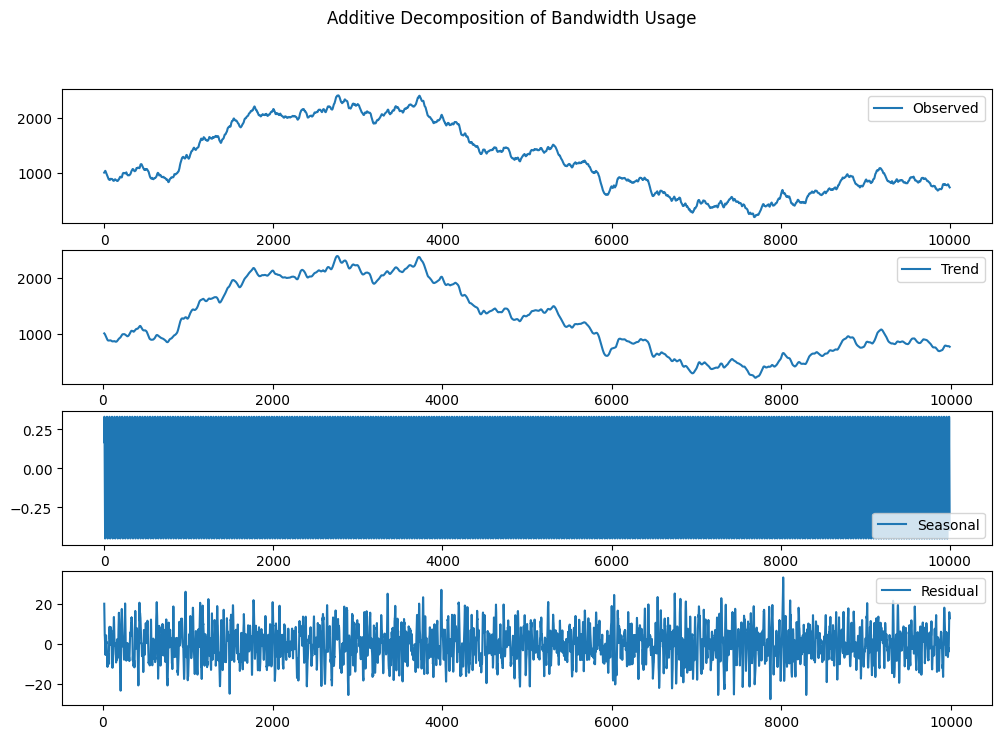

In [ ]:
# Time Series Decomposition
def plot_decomposition(decomposition, title):
    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(decomposition.observed, label="Observed")
    plt.legend()
    plt.subplot(412)
    plt.plot(decomposition.trend, label="Trend")
    plt.legend()
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label="Seasonal")
    plt.legend()
    plt.subplot(414)
    plt.plot(decomposition.resid, label="Residual")
    plt.legend()
    plt.suptitle(title)
    plt.show()

# Additive decomposition
for name, df in datasets.items():
  decomposition_add = seasonal_decompose(df, model="additive", period=30)
  plot_decomposition(decomposition_add, f"Additive Decomposition of {name}")

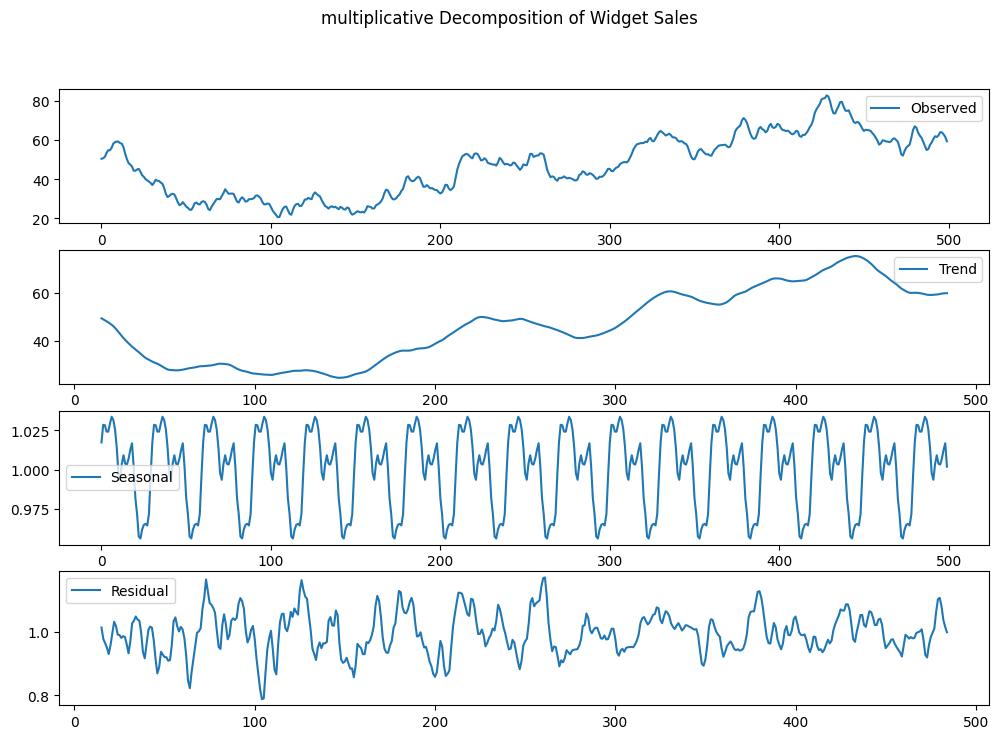

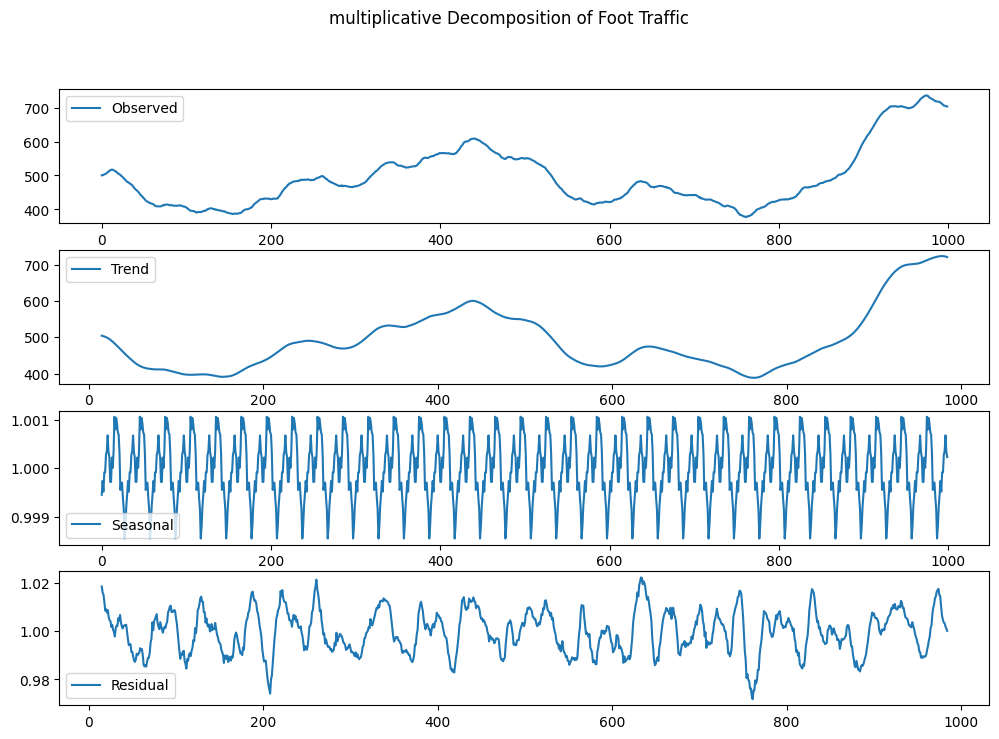

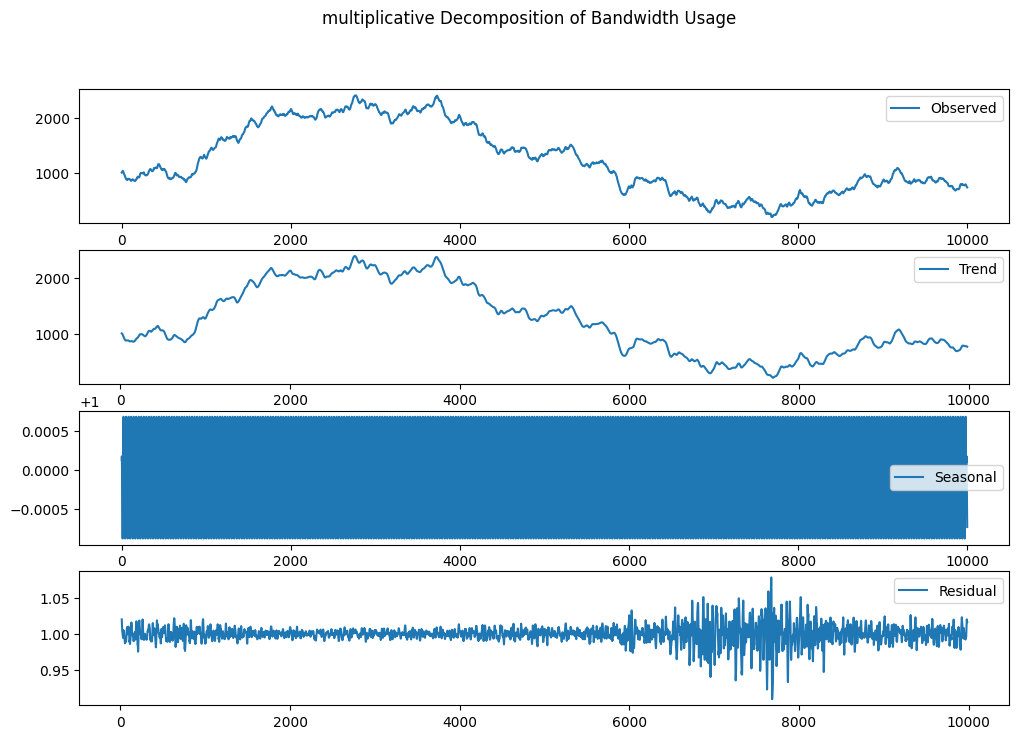

In [ ]:
# Multiplicative decomposition
for name, df in datasets.items():
  decomposition_mul = seasonal_decompose(df, model="multiplicative", period=30)
  plot_decomposition(decomposition_mul, f"multiplicative Decomposition of {name}")

**Questions:**

**● What do you observe in the time series plots?**

Widget Sales :

The first plot (original series)
shows fluctuations in values over time, with an overall increasing trend.
The second plot (trend component) indicates that the data has a long-term trend. It initially decreases, stabilizes, and then starts increasing.
The third plot (seasonal component) shows a repeating pattern, confirming the presence of seasonality. The periodic peaks and troughs suggest a consistent cyclic behavior.
The fourth plot (residual component) captures the remaining variations after removing trend and seasonality. It appears to be more random, meaning most structured patterns are accounted for in the trend and seasonal components.

Foot Traffic :

First Plot (Observed Series):
The observed data shows fluctuations over time with an overall upward trend towards the end.
There are periods of increase and decrease, indicating non-stationarity.
Second Plot (Trend Component):
The trend shows a long-term movement in the data.
It starts with a decline, followed by an increase around the middle, then a slight dip, and a significant upward movement towards the end.
This confirms a strong trend in the dataset.
Third Plot (Seasonal Component):
The seasonal component exhibits a repeating cyclic pattern.
The regular peaks and troughs indicate that seasonality plays a significant role in the dataset.
The periodic behavior remains fairly consistent throughout the timeline.
Fourth Plot (Residual Component):
The residual component captures the remaining variations after removing trend and seasonality.
Some high spikes and variability suggest that there are still some unexplained fluctuations.
However, it appears to be mostly random, meaning the decomposition has effectively captured major patterns.

Bandwidth Usage :

Observed Series (Top Plot)
The data exhibits an overall fluctuating pattern.
There's an upward trend in the early part, followed by a downward trend after a peak, and some recovery towards the end.
Trend Component (Second Plot)
The trend follows a similar pattern to the observed data, confirming a strong long-term movement.
The dataset initially rises, reaches a peak, declines, and then stabilizes.
Seasonal Component (Third Plot)
The seasonal component appears incorrectly visualized.
Instead of a smooth seasonal curve, the plot looks like densely packed bars, which might indicate an issue in decomposition or visualization.
This suggests the seasonal component may not have been extracted properly due to an inappropriate decomposition period.
Residual Component (Bottom Plot)
The residuals show random noise with no clear pattern, which is expected.
However, some high spikes indicate possible anomalies or events not captured by trend/seasonality.



\\

**● Does the data exhibit any trend or seasonality?**

Widget Sales :

Trend: Yes, there is a noticeable long-term trend where values initially decrease and then increase after a certain point.

Seasonality: Yes, the periodic pattern in the seasonal component suggests that the data has a strong seasonal effect, meaning visitor counts fluctuate in a predictable cycle.

Residuals: The residual component seems to have some variability but does not show a clear structure, indicating that most of the patterns have been captured by the trend and seasonal components.

Foot Traffic :

Trend: Yes, the data exhibits a clear long-term trend with fluctuations.

Seasonality: Yes, the data shows a repeating pattern, confirming seasonal behavior.

Residuals: There are some variations left after removing trend and seasonality, but no obvious pattern is visible.

Bandwidth Usage :

Trend is present, as seen in the second plot.

Seasonality may not be extracted correctly, possibly due to incorrect period selection.

Residuals seem mostly random, except for some high peaks.

# **Task 2: Checking for Stationarity**
1. Apply the Augmented Dickey-Fuller (ADF) test to determine whether
the dataset is stationary in case of each dataset.
2. If the data is non-stationary, apply differencing and recheck stationarity.

In [ ]:
def check_stationarity(df):
    result = adfuller(df.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary")

# Stationarity check
for name, df in datasets.items():
    print(f"Checking stationarity for {name}:")
    check_stationarity(df)

Checking stationarity for Widget Sales:
ADF Statistic: -1.5121662069359048
p-value: 0.5274845352272605
Critical Values:
   1%: -3.4436029548776395
   5%: -2.867384756137026
   10%: -2.5698830308597813
Data is non-stationary
Checking stationarity for Foot Traffic:
ADF Statistic: -1.1758885999240747
p-value: 0.683880891789619
Critical Values:
   1%: -3.4369325637409154
   5%: -2.8644462162311934
   10%: -2.568317409920808
Data is non-stationary
Checking stationarity for Bandwidth Usage:
ADF Statistic: -0.8714653199452735
p-value: 0.7972240255014551
Critical Values:
   1%: -3.431004556246501
   5%: -2.8618292749021865
   10%: -2.5669239758928017
Data is non-stationary


In [ ]:
def difference_data(df):
    return df.diff().dropna()

# Stationarity check and differencing
for name, df in datasets.items():
    diff_df = difference_data(df)
    check_stationarity(diff_df)


ADF Statistic: -10.576657780341959
p-value: 7.076922818587193e-19
Critical Values:
   1%: -3.4436029548776395
   5%: -2.867384756137026
   10%: -2.5698830308597813
Data is stationary
ADF Statistic: -5.268231347422044
p-value: 6.369317654781239e-06
Critical Values:
   1%: -3.4369325637409154
   5%: -2.8644462162311934
   10%: -2.568317409920808
Data is stationary
ADF Statistic: -20.694853863789017
p-value: 0.0
Critical Values:
   1%: -3.431004556246501
   5%: -2.8618292749021865
   10%: -2.5669239758928017
Data is stationary


Questions:

● What is the p-value of the ADF test?

Widget Sales : 0.5274845352272605

Foot Traffic : 0.683880891789619

Bandwidth Usage : 0.7972240255014551

● Based on the results, is the dataset stationary or not?

Widget Sales : Non-stationary

Foot Traffic : Non-stationary

Bandwidth Usage : Non-stationary

● If not stationary, how many differences are required to make it
stationary?

Widget Sales : After first difference p value is 7.076922818587193e-19

Foot Traffic : After first difference p value is 6.369317654781239e-06

Bandwidth Usage : After first difference p value is 0.0


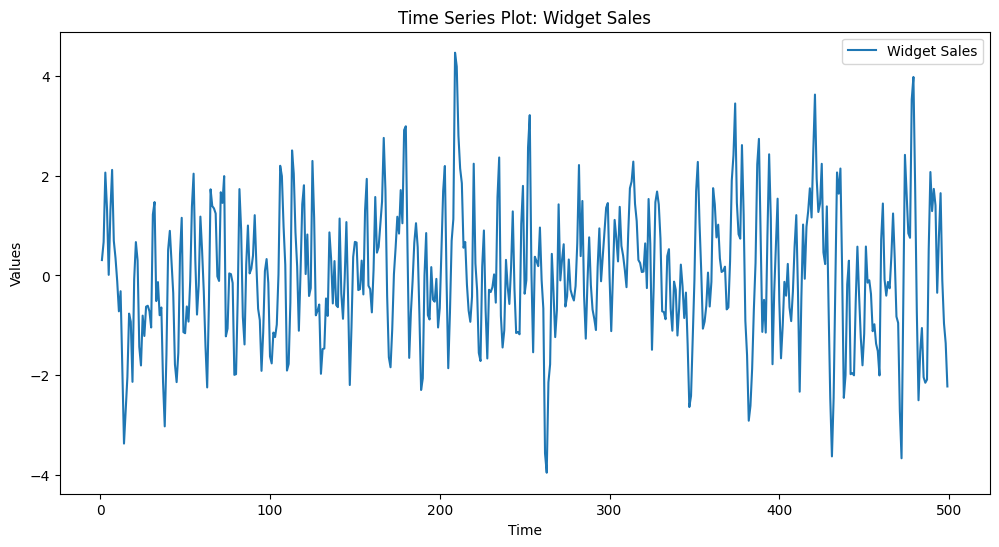

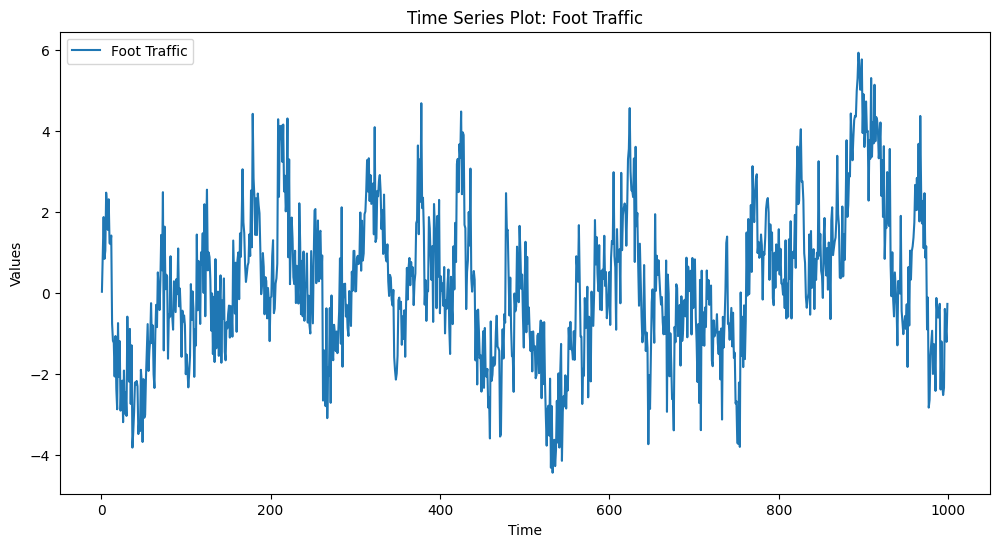

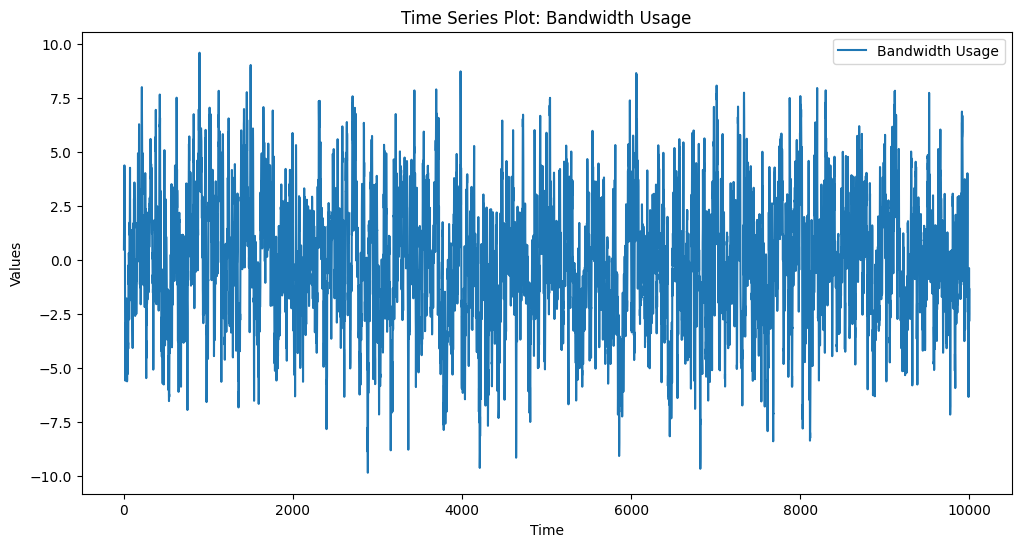

In [ ]:
# Plot differenced data
for name, df in datasets.items():
  diff_df = difference_data(df)
  plot_time_series(diff_df, name)

# **Task 3: Identifying Random Walk Behavior**
1. Check whether the which of the provided dataset follows a random
walk by analyzing its autocorrelation.
2. Plot Autocorrelation Function (ACF) and Partial Autocorrelation
Function (PACF) in case of each dataset.


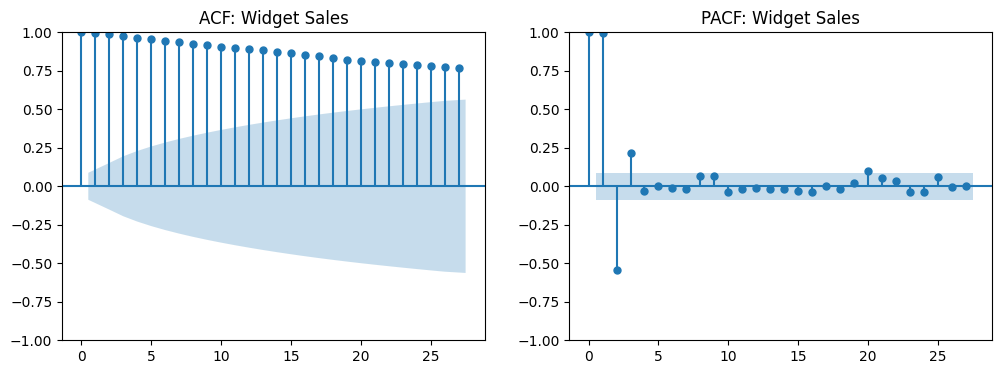

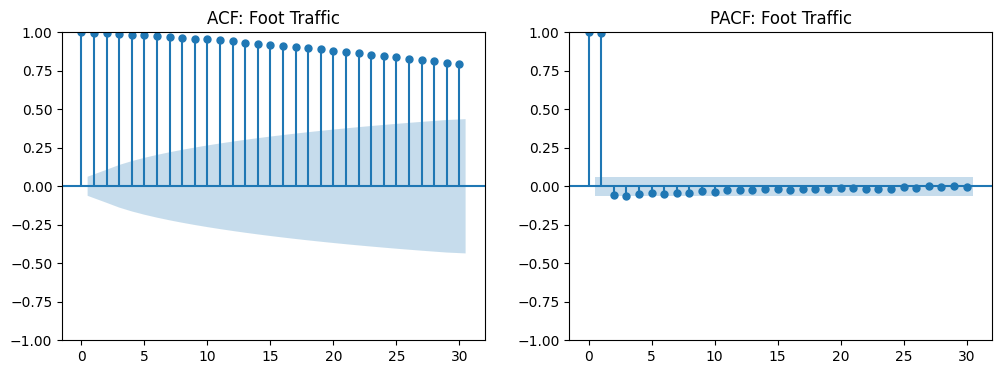

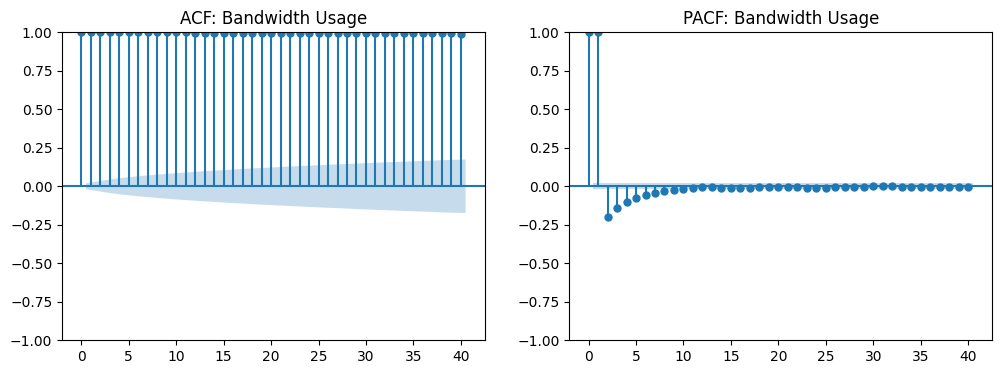

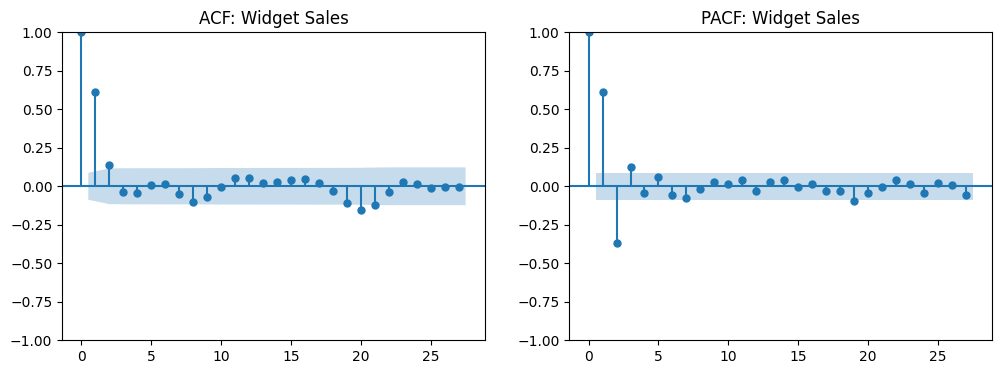

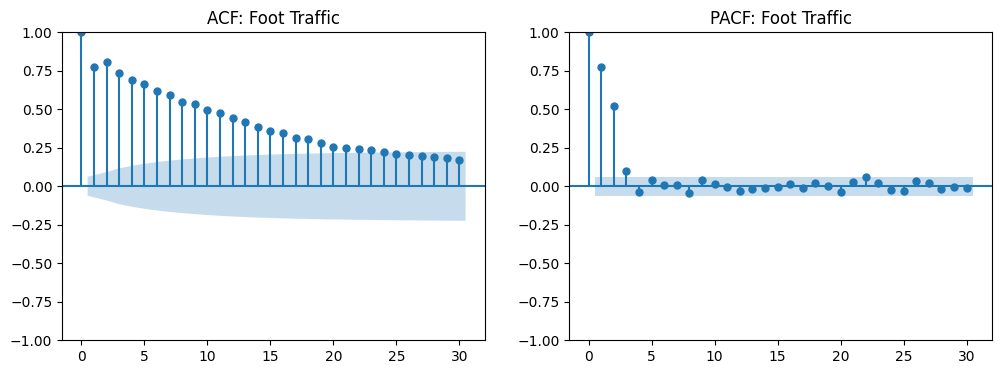

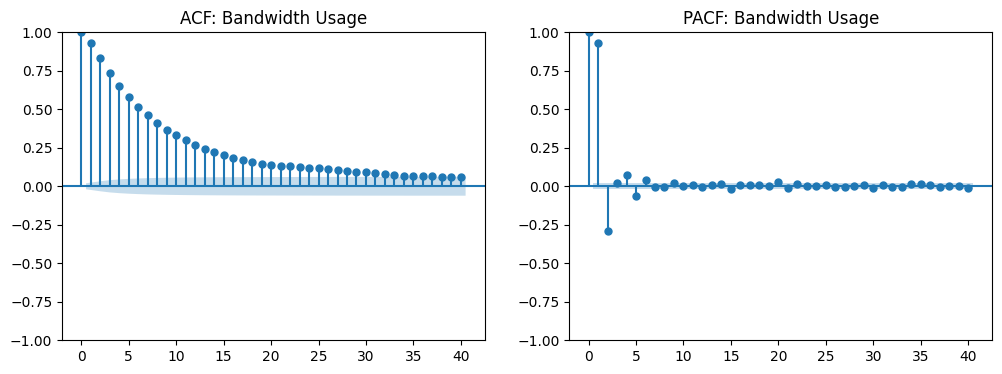

In [ ]:
def plot_acf_pacf(df, title):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(df, ax=ax[0])
    ax[0].set_title(f'ACF: {title}')
    plot_pacf(df, ax=ax[1])
    ax[1].set_title(f'PACF: {title}')
    plt.show()
for name, df in datasets.items():
    plot_acf_pacf(df, name)
for name, df in datasets.items():
    diff_df = difference_data(df)
    plot_acf_pacf(diff_df, name)

The original time series changes over time and is not stable. To make it stable, we take the difference between consecutive values. This helps make the average and spread of values more consistent.

However, even after taking the difference, there are still strong connections between consecutive changes. If the data followed a true random walk, taking the difference would remove these connections, making the result look completely random (like white noise).

Since the differenced series still shows patterns, we can conclude that the time series does not follow a random walk.

Questions:

● What do the ACF and PACF plots indicate?

Widget Sales :

ACF Plot:

A significant spike at lag 1, followed by a gradual decay. This indicates that the current sales are highly correlated with the sales from the previous period.
The gradual decay suggests a possible Moving AVerage (MA) component.

PACF Plot:

A significant spike at lag 1, and then cuts off sharply. This strongly suggests an MA(1) process, meaning the current sales are primarily influenced by the sales from the immediately preceding period.

Foot Traffic :

ACF Plot:

Slow, Gradual Decay: The ACF plot shows a very slow, gradual decay over many lags. This is a hallmark sign of a strong trend or seasonality in the data. The significant correlations persist for a large number of lags.

PACF Plot:

Significant Spike at Lag 1: There's a significant spike at lag 1, but it's not as dominant as in the previous example.
Some Significance in Subsequent Lags: While the PACF cuts off relatively quickly, there are still a few lags that appear to be slightly outside the significance bounds.

Bandwidth Usage :   

ACF Plot:

Gradual, but Less Steep Decay: The ACF shows a gradual decay, but it's not as slow as the "Foot Traffic" example. While there's a trend, it's not as pronounced. The autocorrelations are still significant for a considerable number of lags.

PACF Plot:

Significant Spike at Lag 1: There's a strong, significant spike at lag 1.
Relatively Quick Cutoff: After lag 1, the PACF cuts off relatively quickly, with only a few lags slightly outside the significance bounds.

● How do you interpret the behavior of lags?

Widget Sales :

Lag 1: Both ACF and PACF show a strong positive correlation at lag 1, indicating that the previous period's sales have a significant positive impact on the current period's sales.
Subsequent Lags: The ACF shows a gradual decay, while the PACF cuts off sharply after lag 1. This is a classic pattern for an MA(1) process.

Foot Traffic :    

ACF: The persistent, gradual decay suggests that past foot traffic significantly influences future foot traffic over a long period. This points towards a non-stationary time series with a trend or seasonal component.
PACF: The spike at lag 1 indicates a direct influence of the previous period's foot traffic, but the lingering significance in later lags suggests that there might be more complex dependencies in the data.

Bandwidth Usage :   

ACF: The gradual decay suggests that past bandwidth usage influences future usage, indicating a potential trend or some level of persistence.
PACF: The dominant spike at lag 1 indicates that the immediately preceding period's bandwidth usage has a strong direct impact on the current usage. The quick cutoff suggests that the influence of lags beyond 1 is minimal after accounting for the lag-1 effect.



# **Task 4: Figuring out Correct Models on datasets**

1. In case of all three provided datasets, you need to identify the
appropriate process to be applied. Figure out whether you should apply
either AR or MA or ARMA Model in case of each dataset with reasoning
.
2. Fit the model according to the dataset and check its performance.
3. Evaluate the model using Mean Squared Error (MSE) and Mean
Absolute Error (MAE).

## **Widget Sales dataset**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

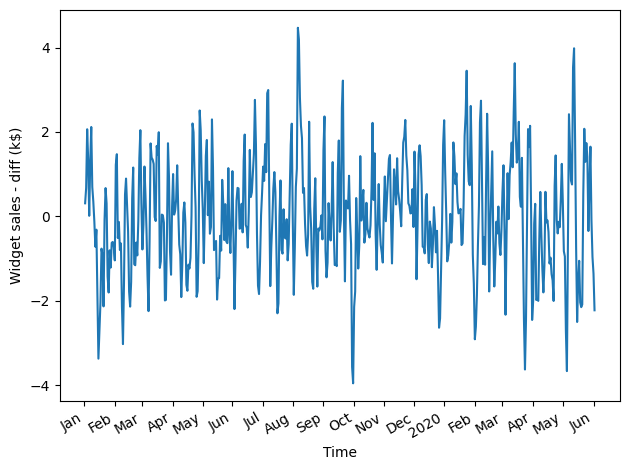

In [ ]:
# Compute first difference of sales
df = widget_sales.copy()
df['widget_sales_diff'] = df['widget_sales'].diff().dropna()

# Plot first differences
fig, ax = plt.subplots()
ax.plot(df['widget_sales_diff'])
ax.set_xlabel('Time')
ax.set_ylabel('Widget sales - diff (k$)')

plt.xticks(
    [0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468, 498],
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
)

fig.autofmt_xdate()
plt.tight_layout()


449
50


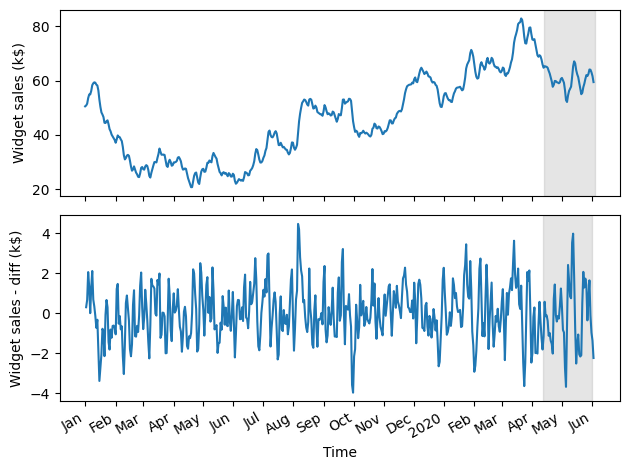

In [ ]:
# Split dataset into training and test sets
df_diff = df[['widget_sales_diff']].dropna()
train = df_diff.iloc[:int(0.9 * len(df_diff))]
test = df_diff.iloc[int(0.9 * len(df_diff)):]

print(len(train))
print(len(test))

# Plot original and differenced series
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1.plot(df['widget_sales'])
ax1.set_xlabel('Time')
ax1.set_ylabel('Widget sales (k$)')
ax1.axvspan(450, 500, color='#808080', alpha=0.2)

ax2.plot(df_diff['widget_sales_diff'])
ax2.set_xlabel('Time')
ax2.set_ylabel('Widget sales - diff (k$)')
ax2.axvspan(449, 498, color='#808080', alpha=0.2)

plt.xticks(
    [0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468, 498],
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
)

fig.autofmt_xdate()
plt.tight_layout()

Mean Squared Errors:
Mean Method: 2.5606299456880537
Last Value Method: 3.2494260812249225
MA Method: 1.948171449776926


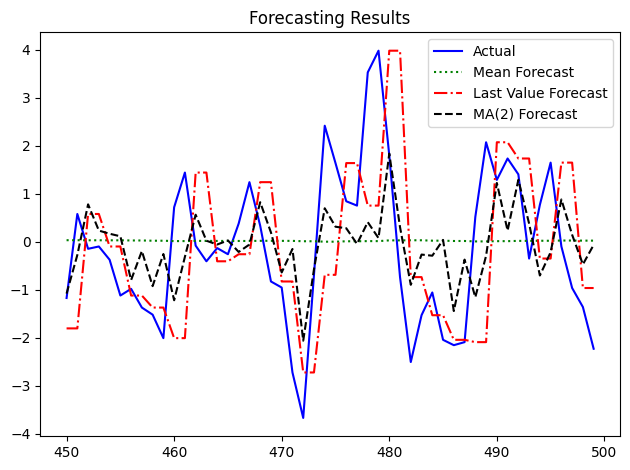

In [ ]:
# Forecasting function
def rolling_forecast(data, train_len, horizon, window, method):
    total_len = train_len + horizon
    predictions = []

    for i in range(train_len, total_len, window):
        if method == 'mean':
            pred = np.mean(data.iloc[:i].values)
        elif method == 'last':
            pred = data.iloc[:i].iloc[-1]
        elif method == 'MA':
            model = SARIMAX(data.iloc[:i], order=(0, 0, 2))
            res = model.fit(disp=False)
            pred = res.get_prediction(start=i, end=i + window - 1).predicted_mean
            pred = pred.tolist() if isinstance(pred, pd.Series) else [pred] * window
        predictions.extend(pred if isinstance(pred, list) else [pred] * window)

    return predictions[:horizon]

# Rolling forecast parameters
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 2

# Compute forecasts
pred_mean = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_MA = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'MA')

# Store predictions in test DataFrame
test = test.iloc[:HORIZON].copy()
test['pred_mean'] = pred_mean
test['pred_last'] = pred_last
test['pred_MA'] = pred_MA

# Evaluate Forecast Performance
mse_mean = mean_squared_error(test['widget_sales_diff'], test['pred_mean'])
mse_last = mean_squared_error(test['widget_sales_diff'], test['pred_last'])
mse_MA = mean_squared_error(test['widget_sales_diff'], test['pred_MA'])

print("Mean Squared Errors:")
print(f'Mean Method: {mse_mean}')
print(f'Last Value Method: {mse_last}')
print(f'MA Method: {mse_MA}')

# Plotting results
fig, ax = plt.subplots()
ax.plot(test['widget_sales_diff'], 'b-', label='Actual')
ax.plot(test['pred_mean'], 'g:', label='Mean Forecast')
ax.plot(test['pred_last'], 'r-.', label='Last Value Forecast')
ax.plot(test['pred_MA'], 'k--', label='MA(2) Forecast')
ax.legend()
plt.title("Forecasting Results")
plt.tight_layout()
plt.show()

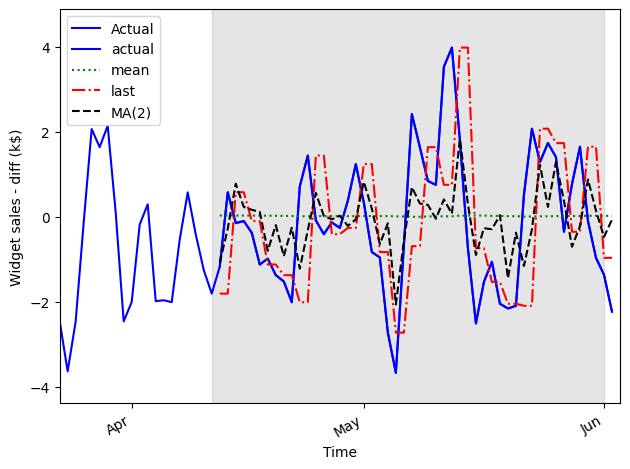

In [ ]:
# Second plot with zoomed-in predictions
fig, ax = plt.subplots()
ax.plot(df_diff, label='Actual', color='blue')
ax.plot(test['widget_sales_diff'], 'b-', label='actual')
ax.plot(test['pred_mean'], 'g:', label='mean')
ax.plot(test['pred_last'], 'r-.', label='last')
ax.plot(test['pred_MA'], 'k--', label='MA(2)')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Widget sales - diff (k$)')
ax.axvspan(449, 498, color='#808080', alpha=0.2)
ax.set_xlim(430, 500)
plt.xticks([439, 468, 498], ['Apr', 'May', 'Jun'])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

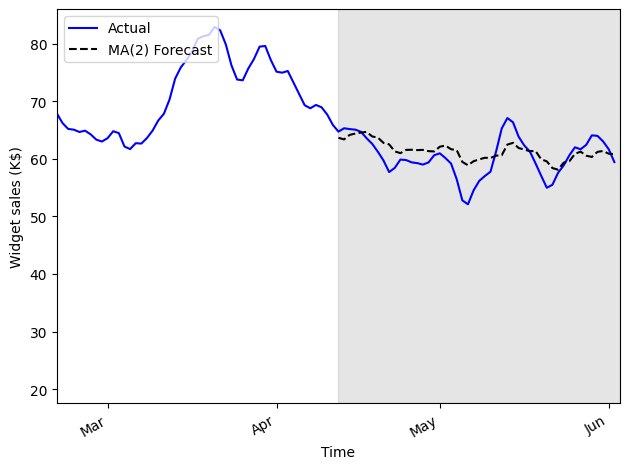

In [ ]:
# Reconstructing widget sales from differenced forecast
pred_df = test.copy()
df['pred_widget_sales'] = np.nan
df.loc[450:, 'pred_widget_sales'] = df['widget_sales'].iloc[450] + pred_df['pred_MA'].cumsum()

fig, ax = plt.subplots()
ax.plot(df['widget_sales'], 'b-', label='Actual')
ax.plot(df['pred_widget_sales'], 'k--', label='MA(2) Forecast')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Widget sales (K$)')
ax.axvspan(450, 500, color='#808080', alpha=0.2)
ax.set_xlim(400, 500)
plt.xticks([409, 439, 468, 498], ['Mar', 'Apr', 'May', 'Jun'])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()


In [ ]:
# Evaluate final performance
mae_MA_undiff = mean_absolute_error(df['widget_sales'].iloc[450:].dropna(), df['pred_widget_sales'].iloc[450:].dropna())
print("Final MAE for MA(2) forecast:", mae_MA_undiff)

Final MAE for MA(2) forecast: 2.3244709244596082


## **Foot Traffic dataset**

In [ ]:
df = foot_traffic.copy()
# Differencing
foot_traffic_diff = np.diff(df['foot_traffic'], n=1)
df_diff = pd.DataFrame({'foot_traffic_diff': foot_traffic_diff})

# Train-Test Split
train = df_diff[:-52]
test = df_diff[-52:]

print(len(train))
print(len(test))


947
52


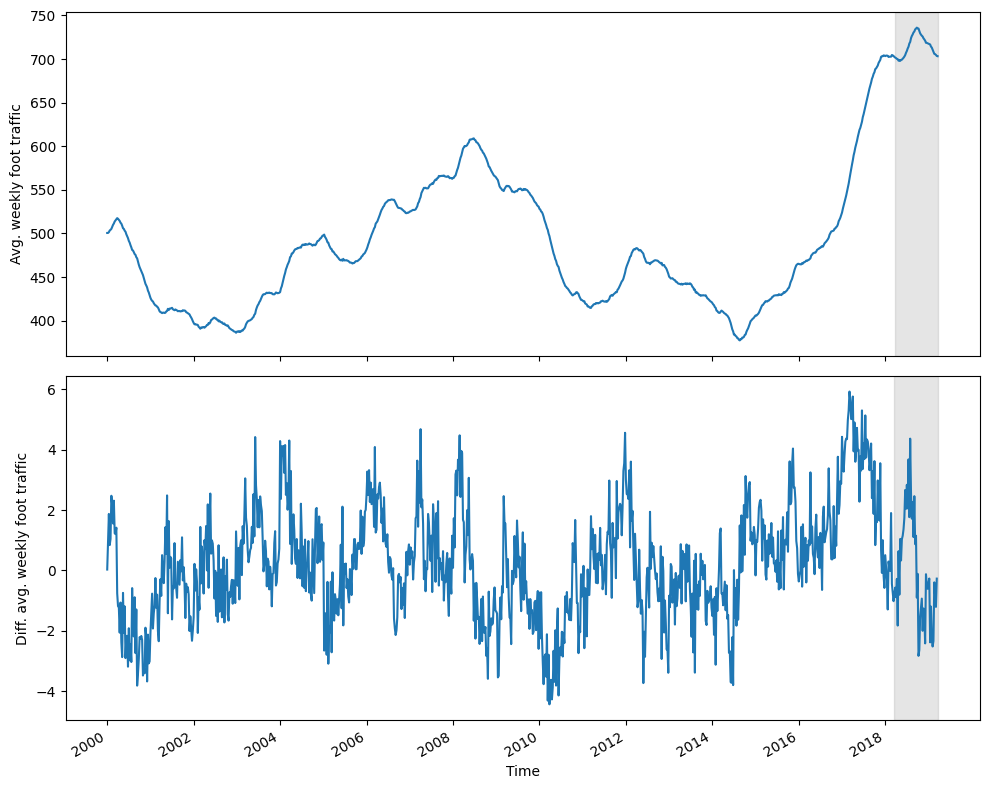

In [ ]:
# Plot Original and Differenced Foot Traffic
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 8))

ax1.plot(df['foot_traffic'])
ax1.set_xlabel('Time')
ax1.set_ylabel('Avg. weekly foot traffic')
ax1.axvspan(948, 1000, color='#808080', alpha=0.2)

ax2.plot(df_diff['foot_traffic_diff'])
ax2.set_xlabel('Time')
ax2.set_ylabel('Diff. avg. weekly foot traffic')
ax2.axvspan(947, 999, color='#808080', alpha=0.2)

plt.xticks(np.arange(0, 1000, 104), np.arange(2000, 2020, 2))

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

     foot_traffic_diff  pred_mean  pred_last_value   pred_AR
947          -0.776601   0.213270        -1.021893 -0.719714
948          -0.574631   0.212226        -0.776601 -0.814547
949          -0.890697   0.211397        -0.574631 -0.664738
950          -0.283552   0.210237        -0.890697 -0.641469
951          -1.830685   0.209717        -0.283552 -0.579279


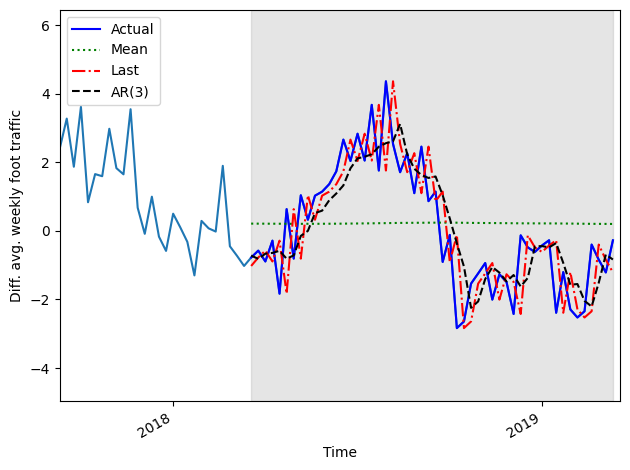

In [ ]:
# Rolling Forecast Function
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    total_len = train_len + horizon
    end_idx = train_len

    if method == 'mean':
        pred_mean = []
        for i in range(train_len, total_len, window):
            mean = np.mean(df.iloc[:i].values)
            pred_mean.extend([mean] * window)
        return pred_mean

    elif method == 'last':
        pred_last_value = []
        for i in range(train_len, total_len, window):
            last_value = df.iloc[:i].iloc[-1].values[0]
            pred_last_value.extend([last_value] * window)
        return pred_last_value

    elif method == 'AR':
        pred_AR = []
        for i in range(train_len, total_len, window):
            model = SARIMAX(df.iloc[:i], order=(3, 0, 0))
            res = model.fit(disp=0)
            predictions = res.get_prediction(start=0, end=i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_AR.extend(oos_pred)
        return pred_AR

# Forecast Parameters
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 1

# Generating Forecasts
pred_mean = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_AR = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'AR')

# Assigning Predictions
test.loc[:, 'pred_mean'] = pred_mean
test.loc[:, 'pred_last_value'] = pred_last_value
test.loc[:, 'pred_AR'] = pred_AR

print(test.head())

# Plot Forecasts
fig, ax = plt.subplots()
ax.plot(df_diff['foot_traffic_diff'])
ax.plot(test['foot_traffic_diff'], 'b-', label='Actual')
ax.plot(test['pred_mean'], 'g:', label='Mean')
ax.plot(test['pred_last_value'], 'r-.', label='Last')
ax.plot(test['pred_AR'], 'k--', label='AR(3)')

ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Diff. avg. weekly foot traffic')
ax.axvspan(947, 998, color='#808080', alpha=0.2)
ax.set_xlim(920, 999)

plt.xticks([936, 988], [2018, 2019])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()


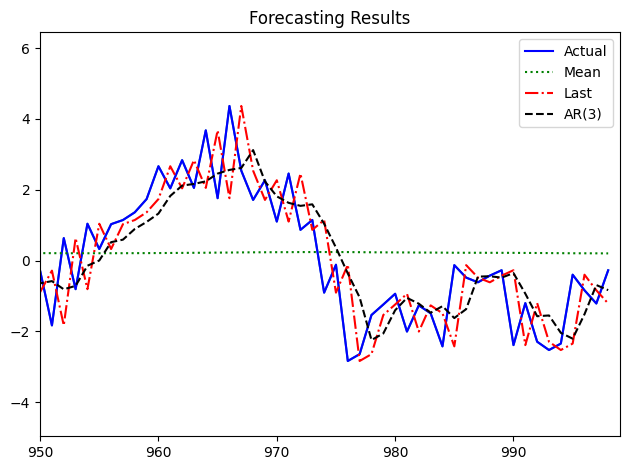

In [ ]:
# Plotting results
fig, ax = plt.subplots()
ax.plot(df_diff['foot_traffic_diff'])
ax.plot(test['foot_traffic_diff'], 'b-', label='Actual')
ax.plot(test['pred_mean'], 'g:', label='Mean')
ax.plot(test['pred_last_value'], 'r-.', label='Last')
ax.plot(test['pred_AR'], 'k--', label='AR(3)')
ax.set_xlim(950, 999)
ax.legend()
plt.title("Forecasting Results")
plt.tight_layout()
plt.show()

In [ ]:
# Compute Errors
mse_mean = mean_squared_error(test['foot_traffic_diff'], test['pred_mean'])
mse_last = mean_squared_error(test['foot_traffic_diff'], test['pred_last_value'])
mse_AR = mean_squared_error(test['foot_traffic_diff'], test['pred_AR'])

print(mse_mean, mse_last, mse_AR)

3.1079979374701447 1.448730118495964 0.9242479164116852


In [ ]:
# Reconstruct Original Series
df['pred_foot_traffic'] = pd.Series(dtype='float64')
df.loc[948:, 'pred_foot_traffic'] = df.loc[948, 'foot_traffic'] + test['pred_AR'].cumsum().values

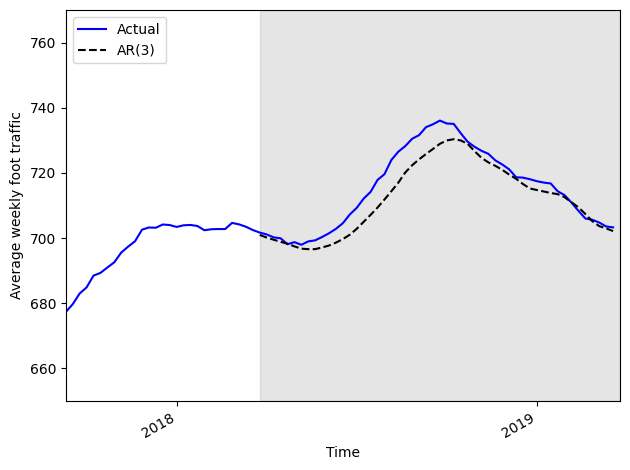

In [ ]:
# Plot Actual vs Predicted Foot Traffic
fig, ax = plt.subplots()

ax.plot(df['foot_traffic'], 'b-', label='Actual')
ax.plot(df['pred_foot_traffic'], 'k--', label='AR(3)')

ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Average weekly foot traffic')
ax.axvspan(948, 1000, color='#808080', alpha=0.2)

ax.set_xlim(920, 1000)
ax.set_ylim(650, 770)

plt.xticks([936, 988], [2018, 2019])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [ ]:
# Compute MAE for Undifferenced Forecast
mae_AR_undiff = mean_absolute_error(df['foot_traffic'][948:], df['pred_foot_traffic'][948:])
print(mae_AR_undiff)

3.478033559658852


## **Bandwidth usage**

In [ ]:
df = bandwidth_usage.copy()
bandwidth_diff = np.diff(df.hourly_bandwidth, n=1)
df_diff = pd.DataFrame({'bandwidth_diff': bandwidth_diff})
train = df_diff[:-168]
test = df_diff[-168:]


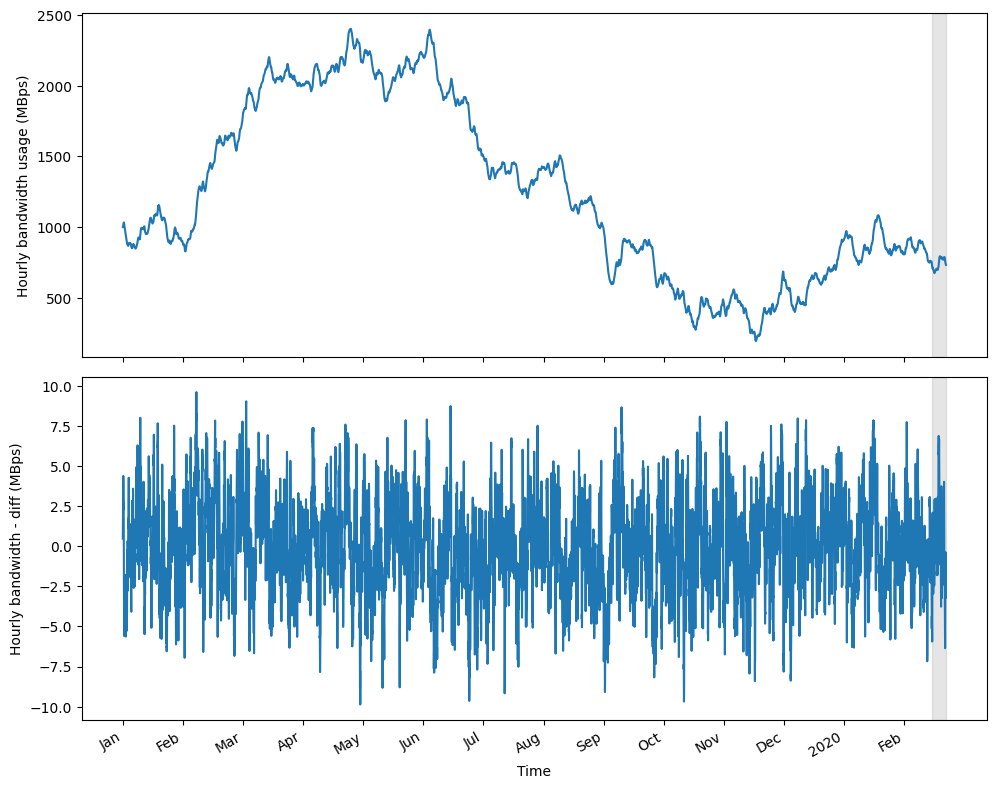

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 8))
ax1.plot(df['hourly_bandwidth'])
ax1.set_xlabel('Time')
ax1.set_ylabel('Hourly bandwidth usage (MBps)')
ax1.axvspan(9831, 10000, color='#808080', alpha=0.2)

ax2.plot(df_diff['bandwidth_diff'])
ax2.set_xlabel('Time')
ax2.set_ylabel('Hourly bandwidth - diff (MBps)')
ax2.axvspan(9830, 9999, color='#808080', alpha=0.2)

plt.xticks(np.arange(0, 10000, 730), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb'])
fig.autofmt_xdate()
plt.tight_layout()


In [ ]:
# Function to optimize ARMA model
def optimize_ARMA(endog: pd.Series, order_list: list) -> pd.DataFrame:
    results = []
    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(endog, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False)
            aic = model.aic
            results.append([order, aic])
        except:
            continue

    result_df = pd.DataFrame(results, columns=['(p,q)', 'AIC'])
    return result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

ps = range(0, 4, 1)
qs = range(0, 4, 1)
order_list = list(product(ps, qs))
result_df = optimize_ARMA(train['bandwidth_diff'], order_list)

  0%|          | 0/16 [00:00<?, ?it/s]

In [ ]:
model = SARIMAX(train['bandwidth_diff'], order=(2,0,2), simple_differencing=False)
model_fit = model.fit(disp=False)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         bandwidth_diff   No. Observations:                 9831
Model:               SARIMAX(2, 0, 2)   Log Likelihood              -13990.802
Date:                Thu, 13 Mar 2025   AIC                          27991.604
Time:                        07:14:54   BIC                          28027.570
Sample:                             0   HQIC                         28003.788
                               - 9831                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3486      0.052      6.765      0.000       0.248       0.450
ar.L2          0.4743      0.047     10.000      0.000       0.381       0.567
ma.L1          0.8667      0.050     17.249      0.0

lb_pvalue


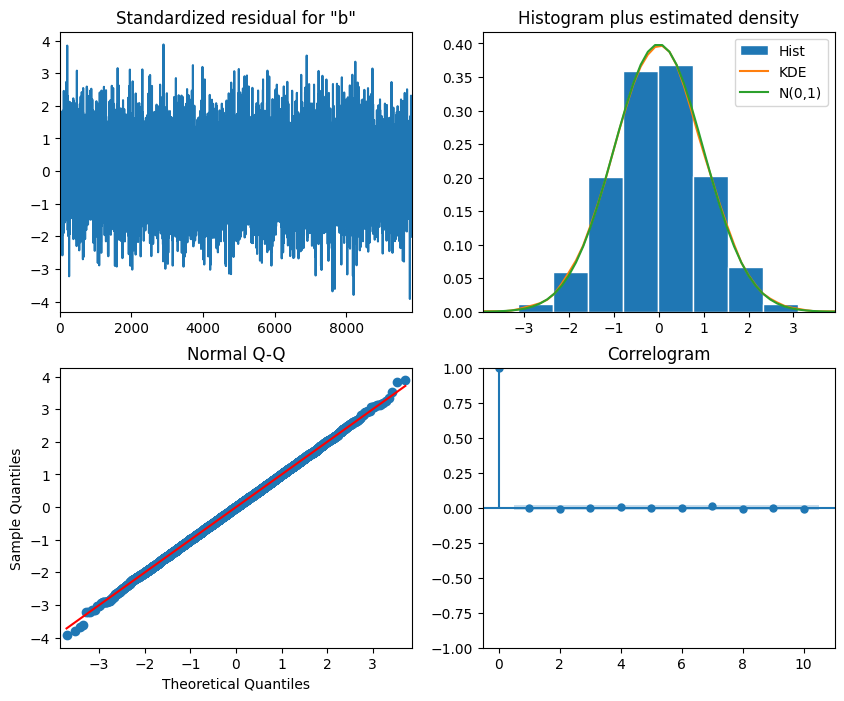

In [ ]:
model_fit.plot_diagnostics(figsize=(10, 8))

residuals = model_fit.resid
lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))
print(pvalue)

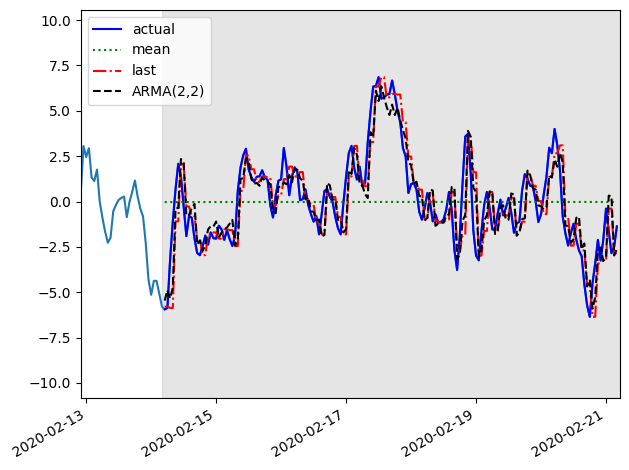

In [ ]:
# Rolling forecast function
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    total_len = train_len + horizon
    if method == 'mean':
        return [np.mean(df[:i].values) for i in range(train_len, total_len, window) for _ in range(window)]
    elif method == 'last':
        return [df[:i].iloc[-1].values[0] for i in range(train_len, total_len, window) for _ in range(window)]
    elif method == 'ARMA':
        pred_ARMA = []
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(2,0,2))
            res = model.fit(disp=False)
            pred_ARMA.extend(res.get_prediction(0, i + window - 1).predicted_mean.iloc[-window:])
        return pred_ARMA

TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 2

test['pred_mean'] = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean')
test['pred_last_value'] = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'last')
test['pred_ARMA'] = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'ARMA')

fig, ax = plt.subplots()
ax.plot(df_diff['bandwidth_diff'])
ax.plot(test['bandwidth_diff'], 'b-', label='actual')
ax.plot(test['pred_mean'], 'g:', label='mean')
ax.plot(test['pred_last_value'], 'r-.', label='last')
ax.plot(test['pred_ARMA'], 'k--', label='ARMA(2,2)')
ax.legend(loc=2)
ax.axvspan(9830, 9999, color='#808080', alpha=0.2)
ax.set_xlim(9800, 9999)

plt.xticks(
    [9802, 9850, 9898, 9946, 9994],
    ['2020-02-13', '2020-02-15', '2020-02-17', '2020-02-19', '2020-02-21'])

fig.autofmt_xdate()
plt.tight_layout()


In [ ]:
  mse_mean = mean_squared_error(test['bandwidth_diff'], test['pred_mean'])
  mse_last = mean_squared_error(test['bandwidth_diff'], test['pred_last_value'])
  mse_ARMA = mean_squared_error(test['bandwidth_diff'], test['pred_ARMA'])
  print(mse_mean, mse_last, mse_ARMA)

6.306526957989325 2.2297582947733656 1.7690462114420604


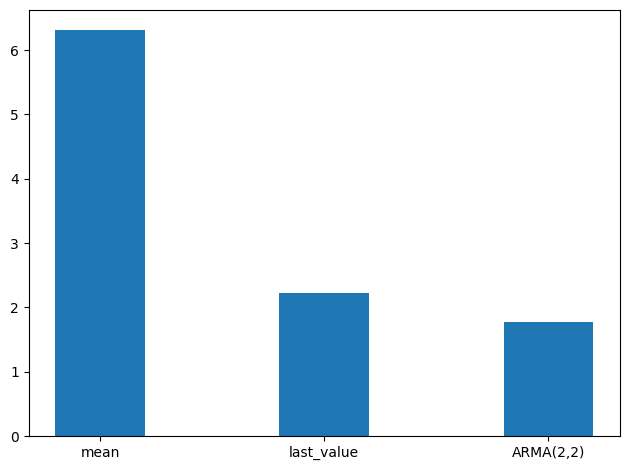

In [ ]:
fig, ax = plt.subplots()
ax.bar(['mean', 'last_value', 'ARMA(2,2)'], [mse_mean, mse_last, mse_ARMA], width=0.4)
plt.tight_layout()

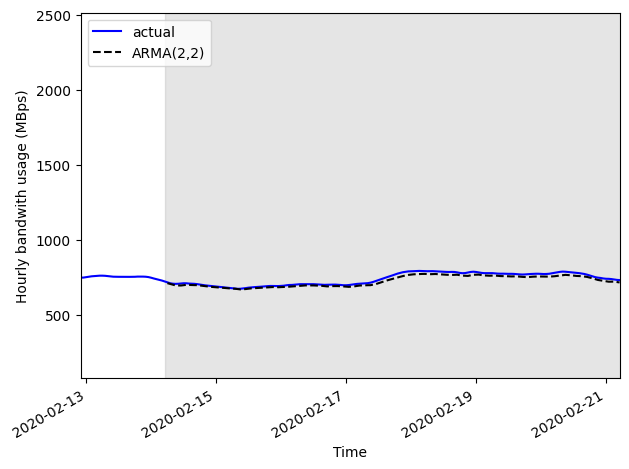

In [ ]:
df['pred_bandwidth'] = pd.Series()
df['pred_bandwidth'][9832:] = df['hourly_bandwidth'].iloc[9832] + test['pred_ARMA'].cumsum()
fig, ax = plt.subplots()
ax.plot(df['hourly_bandwidth'], 'b-', label='actual')
ax.plot(df['pred_bandwidth'], 'k--', label='ARMA(2,2)')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Hourly bandwith usage (MBps)')

ax.axvspan(9831, 10000, color='#808080', alpha=0.2)

ax.set_xlim(9800, 9999)

plt.xticks(
    [9802, 9850, 9898, 9946, 9994],
    ['2020-02-13', '2020-02-15', '2020-02-17', '2020-02-19', '2020-02-21'])

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
mae_ARMA_undiff = mean_absolute_error(df['hourly_bandwidth'][9832:], df['pred_bandwidth'][9832:])
print(mae_ARMA_undiff)

14.000362773294084


In [ ]:
def fit_arima_model(df, order):
    model = ARIMA(df, order=order)
    model_fit = model.fit()
    return model_fit

In [ ]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f'MSE: {mse}')
    print(f'MAE: {mae}')
    return mse, mae

In [ ]:

def residual_analysis(model_fit):
    residuals = model_fit.resid
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(residuals, kde=True, ax=ax[0])
    ax[0].set_title("Residual Histogram")
    sm.qqplot(residuals, line='s', ax=ax[1])
    ax[1].set_title("QQ Plot of Residuals")
    plt.show()

Fitting ARIMA model for Widget Sales
MSE: 2.502132754789037
MAE: 1.366859388382906


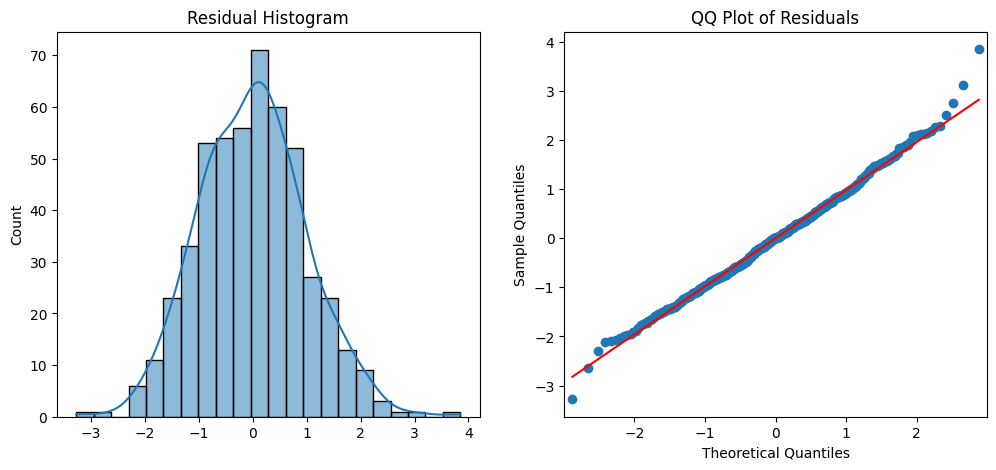

Fitting ARIMA model for Foot Traffic
MSE: 1.7192110698420897
MAE: 1.0492890813883862


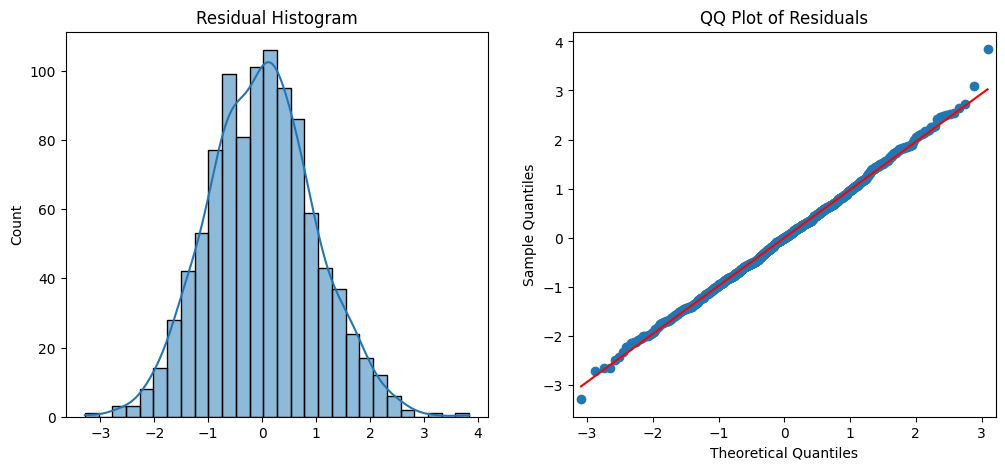

Fitting ARIMA model for Bandwidth Usage
MSE: 4.334798355368438
MAE: 1.8571405911550158


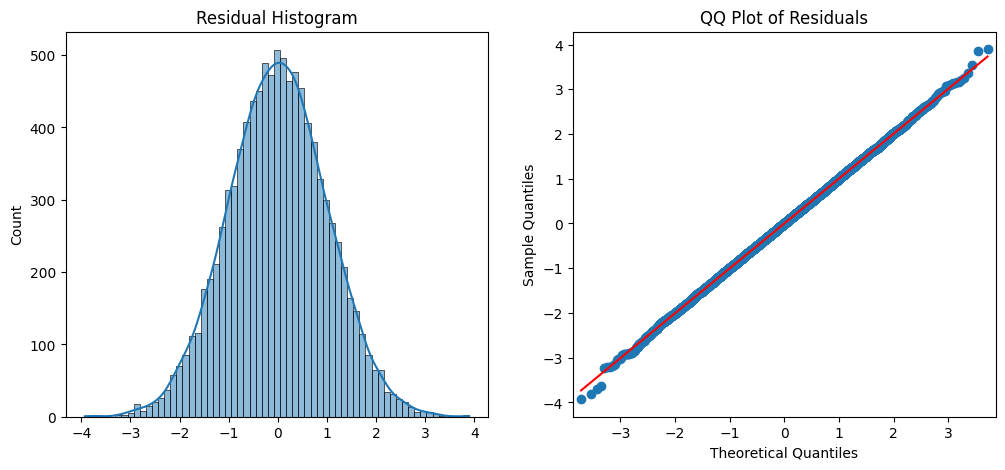

In [ ]:

# Model fitting and evaluation
orders = {'Widget Sales': (0, 0, 2), 'Foot Traffic': (3, 0, 0), 'Bandwidth Usage': (2, 0, 2)}
for name, df in datasets.items():
    diff_df = difference_data(df)
    print(f"Fitting ARIMA model for {name}")
    model_fit = fit_arima_model(diff_df, orders[name])
    forecast = model_fit.forecast(steps=10)
    evaluate_model(diff_df[-10:], forecast)
    residual_analysis(model_fit)